In [3]:
import pandas as pd

df_complaints = pd.read_csv("Complaints.zip", compression="zip", low_memory=False)
df_complaints = df_complaints.dropna(subset=["NEIGHBORHOOD", "CREATED_ON"])

df_complaints["CREATED_ON"] = pd.to_datetime(df_complaints["CREATED_ON"], errors="coerce")
df_complaints = df_complaints.dropna(subset=["CREATED_ON"])  # drop rows that failed to parse
df_complaints["Year"] = df_complaints["CREATED_ON"].dt.year

complaints_by_neighborhood = (
    df_complaints
    .groupby("NEIGHBORHOOD")
    .size()
    .reset_index(name="Complaint_Count")
)

top10_least_complaints = (
    complaints_by_neighborhood
    .sort_values("Complaint_Count", ascending=True)
    .head(10)
)

print("Top 10 neighborhoods with the least total complaints:")
print(top10_least_complaints)

top10_neighborhoods = top10_least_complaints["NEIGHBORHOOD"].tolist()
df_top10 = df_complaints[df_complaints["NEIGHBORHOOD"].isin(top10_neighborhoods)]

complaints_per_year = (
    df_top10
    .groupby(["NEIGHBORHOOD", "Year"])
    .size()
    .reset_index(name="Complaint_Count")
)

print("\nYearly complaint counts (sorted from lowest to highest) for each of the top 10 neighborhoods:")
for nhood in top10_neighborhoods:
    sub = (
        complaints_per_year[complaints_per_year["NEIGHBORHOOD"] == nhood]
        .sort_values("Complaint_Count", ascending=True)
    )
    print(f"\nNeighborhood: {nhood}")
    print(sub[["Year", "Complaint_Count"]].to_string(index=False))

Top 10 neighborhoods with the least total complaints:
            NEIGHBORHOOD  Complaint_Count
52  Mount Oliver Borough               64
4      Arlington Heights              140
35            Glen Hazel              443
58     Northview Heights              661
26         East Carnegie              666
67             Ridgemont              714
20        Chartiers City              823
78             St. Clair              888
31             Fairywood             1048
37                  Hays             1157

Yearly complaint counts (sorted from lowest to highest) for each of the top 10 neighborhoods:

Neighborhood: Mount Oliver Borough
 Year  Complaint_Count
 2021                2
 2018                5
 2020                5
 2022                5
 2015                6
 2017                6
 2019                9
 2016               26

Neighborhood: Arlington Heights
 Year  Complaint_Count
 2020                6
 2015               12
 2016               14
 2018               1

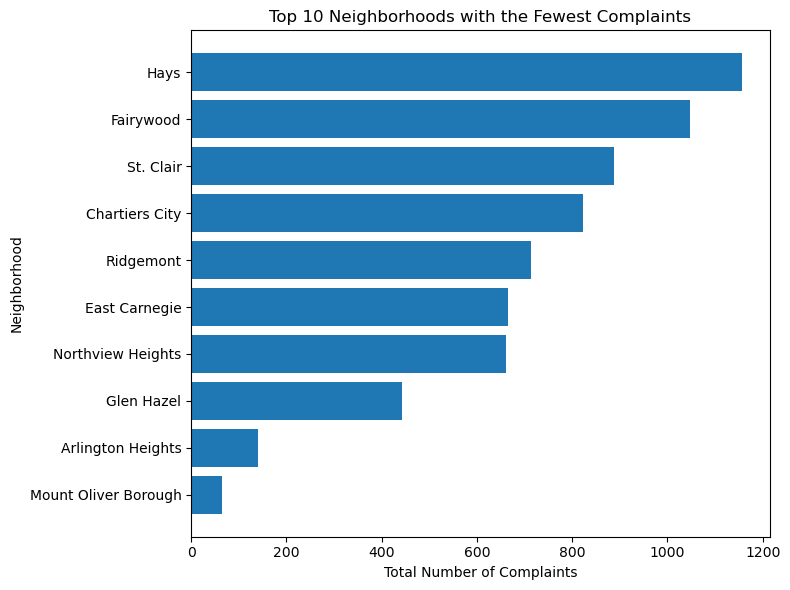

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the complaints dataset
df_complaints = pd.read_csv("Complaints.zip", compression="zip", low_memory=False)
# 2. Drop rows with missing neighborhood
df_complaints = df_complaints.dropna(subset=["NEIGHBORHOOD"])

complaints_by_neighborhood = (
    df_complaints
    .groupby("NEIGHBORHOOD")
    .size()
    .reset_index(name="Complaint_Count")
)

top10_least = (
    complaints_by_neighborhood
    .sort_values("Complaint_Count", ascending=True)
    .head(10)
)

plt.figure(figsize=(8, 6))
plt.barh(
    top10_least["NEIGHBORHOOD"],
    top10_least["Complaint_Count"]
)
plt.xlabel("Total Number of Complaints")
plt.ylabel("Neighborhood")
plt.title("Top 10 Neighborhoods with the Fewest Complaints")
plt.tight_layout()
plt.show()